    Topic:        Challenge Set 1  
    Subject:      Explore MTA turnstile data  
    Date:         07/09/2018  
    Name:         Courtney  
    Worked with:  Tim, Brandon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Challenge 1**

* Open up a new Jupyter notebook
* Download a few MTA turnstile data files
* Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION).

First, create a function to retrieve the necessary data from April, May and June 2018.

In [2]:
# Data Source: http://web.mta.info/developers/turnstile.html
def get_data(weeks):
    """
    Retrieve and read data from a website
    ---
    Input: list of ints or strings, or single int/string
    """
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    data = []
    for week in weeks:
        file_url = url.format(week)
        data.append(pd.read_csv(file_url))
    return pd.concat(data)

# Pull data from April, May and June 2018
"""week_labels = [180630, 180623, 180616, 180609, 180602, 180526, 
               180519, 180512, 180505, 180428, 180421, 180414, 180407] """
week_labels = [160903, 160910, 160917]
turnstiles_df = get_data(week_labels)

Alternatively if the file is already saved locally in the same
directory as the Jupyter notebook, uncomment & run the below after 
assigning the local data file name to the variable file.

In [ ]:
# data_file = 'data_file.txt'
# turnstiles_df = pd.read_csv(data_file)

In [ ]:
# turnstiles_df.head()

In [3]:
turnstiles_df.shape

(580895, 11)

**Challenge 2**

In [4]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [5]:
turnstiles_df["DATE"] = pd.to_datetime(turnstiles_df.DATE, format="%m/%d/%Y")

In [56]:
time_series_df = pd.DataFrame(turnstiles_df[['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'ENTRIES', 'DATE_TIME', 'DATE', 'DESC']])

In [57]:
time_series_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES,DATE_TIME,DATE,DESC
0,A002,R051,02-00-00,59 ST,NQR456,5799442,2016-08-27 00:00:00,2016-08-27,REGULAR
1,A002,R051,02-00-00,59 ST,NQR456,5799463,2016-08-27 04:00:00,2016-08-27,REGULAR
2,A002,R051,02-00-00,59 ST,NQR456,5799492,2016-08-27 08:00:00,2016-08-27,REGULAR
3,A002,R051,02-00-00,59 ST,NQR456,5799610,2016-08-27 12:00:00,2016-08-27,REGULAR
4,A002,R051,02-00-00,59 ST,NQR456,5799833,2016-08-27 16:00:00,2016-08-27,REGULAR


In [58]:
time_series_df.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
ENTRIES               int64
DATE_TIME    datetime64[ns]
DATE         datetime64[ns]
DESC                 object
dtype: object

**Challenge 3**

How many hours apart are the measurements?  
What is the total number of entries per day for each turnstile?  

Subtract a minute from time points to account for 12am registering for the next day.

In [59]:
time_series_df.loc[:,'DATE_TIME'] = time_series_df.loc[:,'DATE_TIME'] - pd.Timedelta(minutes=1)

In [60]:
time_series_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES,DATE_TIME,DATE,DESC
0,A002,R051,02-00-00,59 ST,NQR456,5799442,2016-08-26 23:59:00,2016-08-27,REGULAR
1,A002,R051,02-00-00,59 ST,NQR456,5799463,2016-08-27 03:59:00,2016-08-27,REGULAR
2,A002,R051,02-00-00,59 ST,NQR456,5799492,2016-08-27 07:59:00,2016-08-27,REGULAR
3,A002,R051,02-00-00,59 ST,NQR456,5799610,2016-08-27 11:59:00,2016-08-27,REGULAR
4,A002,R051,02-00-00,59 ST,NQR456,5799833,2016-08-27 15:59:00,2016-08-27,REGULAR


Create a new Date column with the YYYY-MM-DD format based on the dates after subtracting 1 minute. 

In [61]:
time_series_df.loc[:,'DATE'] = time_series_df.loc[:,'DATE_TIME'].dt.date

In [62]:
time_series_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES,DATE_TIME,DATE,DESC
0,A002,R051,02-00-00,59 ST,NQR456,5799442,2016-08-26 23:59:00,2016-08-26,REGULAR
1,A002,R051,02-00-00,59 ST,NQR456,5799463,2016-08-27 03:59:00,2016-08-27,REGULAR
2,A002,R051,02-00-00,59 ST,NQR456,5799492,2016-08-27 07:59:00,2016-08-27,REGULAR
3,A002,R051,02-00-00,59 ST,NQR456,5799610,2016-08-27 11:59:00,2016-08-27,REGULAR
4,A002,R051,02-00-00,59 ST,NQR456,5799833,2016-08-27 15:59:00,2016-08-27,REGULAR


Let's see what the time intervals are between measurements. 

In [63]:
group_vals = ['C/A', 'UNIT', 'SCP','STATION']

In [64]:
time_intervals = time_series_df.groupby(by=group_vals)['DATE_TIME'].transform(lambda x: x.diff())

In [65]:
time_intervals.head()

0        NaT
1   04:00:00
2   04:00:00
3   04:00:00
4   04:00:00
Name: DATE_TIME, dtype: timedelta64[ns]

In [66]:
time_intervals.value_counts(normalize=True).head()

04:00:00    0.923117
04:12:00    0.050484
08:00:00    0.000921
04:26:00    0.000670
00:01:20    0.000278
Name: DATE_TIME, dtype: float64

In the test dataset, the vast majority of time intervals are 4-hour time intervals.   

---
Now let's work on the total entries per turnstile per day. 

In [67]:
entry_diff_per_turnstile_interval = time_series_df.groupby(by=group_vals)['ENTRIES'].transform(lambda x: x.diff())

In [68]:
entry_diff_per_turnstile_interval.head()

0      NaN
1     21.0
2     29.0
3    118.0
4    223.0
Name: ENTRIES, dtype: float64

In [69]:
time_series_df["ENTRY_DIFF"] = entry_diff_per_turnstile_interval

In [70]:
time_series_df["TIME_INTERVAL"] = time_intervals

In [71]:
time_series_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES,DATE_TIME,DATE,DESC,ENTRY_DIFF,TIME_INTERVAL
0,A002,R051,02-00-00,59 ST,NQR456,5799442,2016-08-26 23:59:00,2016-08-26,REGULAR,NaN,NaT
1,A002,R051,02-00-00,59 ST,NQR456,5799463,2016-08-27 03:59:00,2016-08-27,REGULAR,21.0,04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,5799492,2016-08-27 07:59:00,2016-08-27,REGULAR,29.0,04:00:00
3,A002,R051,02-00-00,59 ST,NQR456,5799610,2016-08-27 11:59:00,2016-08-27,REGULAR,118.0,04:00:00
4,A002,R051,02-00-00,59 ST,NQR456,5799833,2016-08-27 15:59:00,2016-08-27,REGULAR,223.0,04:00:00


Remove missing data (dates at the start of each set of turnstile data, where we have no prior date to compare the turnstile count to).

In [72]:
time_series_df.shape

(580895, 11)

In [73]:
time_series_df = time_series_df.dropna(subset=['ENTRY_DIFF'])

In [74]:
time_series_df.shape

(576317, 11)

** NEED TO DROP DUPLICATE AUDITS AND DO SOMETHING WITH NEGATIVE NUMBERS - REMOVE THE ROWS WITH AUDITS, AND SET NEGATIVES TO 0 OR THE PREVIOUS TIME INTERVAL**

In [75]:
time_series_df.DESC.value_counts()

REGULAR       574554
RECOVR AUD      1763
Name: DESC, dtype: int64

In [76]:
grouping = ['C/A', 'UNIT', 'SCP', 'STATION','LINENAME','DATE']

In [77]:
daily_entries_per_turnstile = time_series_df.groupby(by=grouping)['ENTRY_DIFF'].sum().reset_index()

In [80]:
daily_entries_per_turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRY_DIFF
0,A002,R051,02-00-00,59 ST,NQR456,2016-08-27,810.0
1,A002,R051,02-00-00,59 ST,NQR456,2016-08-28,682.0
2,A002,R051,02-00-00,59 ST,NQR456,2016-08-29,1580.0
3,A002,R051,02-00-00,59 ST,NQR456,2016-08-30,1557.0
4,A002,R051,02-00-00,59 ST,NQR456,2016-08-31,1567.0


**Challenge 4**

In [85]:
mask = ((daily_entries_per_turnstile["C/A"] == "A002") &
(daily_entries_per_turnstile["UNIT"] == "R051") &
(daily_entries_per_turnstile["SCP"] == "02-00-00") &(daily_entries_per_turnstile["STATION"] == "59 ST") &
(daily_entries_per_turnstile["LINENAME"] == "NQR456")) 

dates = list(daily_entries_per_turnstile[mask]["DATE"])
counts = list(daily_entries_per_turnstile[mask]["ENTRY_DIFF"])

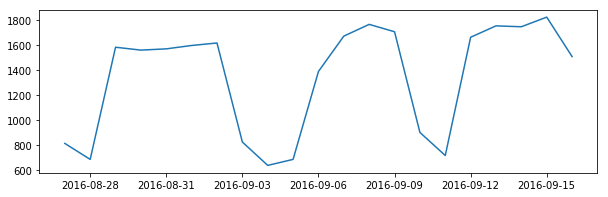

In [86]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)